Este notebook de pruebas es para ver cómo se visualiza bien la simulación del Corridor

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial.distance as dist
import matplotlib as mpl
from navground import sim, core
# from tslearn import metrics

In [15]:
length = 10.0
width = 3
num_steps = 100
time_step = 0.1
num_agents = 19
max_speed = 0.166
safety_margin = 0.3
radius = 0.1

# yaml = """
# steps: 100
# time_step: 0.04
# save_directory: ''
# record_pose: true
# scenario:
#   type: Corridor
#   length: 8.0
#   width: 0.6
#   groups:
#     -
#       type: thymio
#       number: 20
#       radius: 0.08
#       control_period: 0.1
#       speed_tolerance: 0.02
#       kinematics:
#         type: 2WDiff
#         wheel_axis: 0.094
#         max_speed: 0.166
#       behavior:
#         type: HL
#         optimal_speed: 0.12
#         horizon: 5.0
#         safety_margin: 0.02
#       state_estimation:
#         type: Bounded
#         range: 5.0
# """

yaml = f"""
steps: {num_steps}
time_step: {time_step}
save_directory: ''
record_pose: true
record_twist: true
scenario:
  type: Corridor
  length: {length}
  width: {width}
  groups:
    -
      type: thymio
      number: {num_agents}
      radius: {radius}
      control_period: 0.2
      speed_tolerance: 0.02
      kinematics:
        type: 2WDiff
        wheel_axis: 0.094
        max_speed: {max_speed}
      behavior:
        type: HL
        optimal_speed: 0.12
        horizon: 5.0
        safety_margin: {safety_margin}
      state_estimation:
        type: Bounded
        range: 5.0
"""

yaml = """
steps: 3000
time_step: 0.04
save_directory: ''
record_pose: true
scenario:
  type: Cross
  agent_margin: 0.1
  side: 4
  target_margin: 0.1
  tolerance: 0.5
  groups:
    -
      type: thymio
      number: 20
      radius: 0.08
      control_period: 0.1
      speed_tolerance: 0.02
      kinematics:
        type: 2WDiff
        wheel_axis: 0.094
        max_speed: 0.166
      behavior:
        type: HL
        optimal_speed: 0.12
        horizon: 5.0
        safety_margin: 0.02
      state_estimation:
        type: Bounded
        range: 5.0
"""
experiment = sim.load_experiment(yaml)
experiment.run()
run = experiment.runs[0]

In [28]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
from navground.sim.ui.video import record_video

def linear_map(a, b, cmap):
    c = cmx.ScalarMappable(norm=colors.Normalize(vmin=a, vmax=b), cmap=cmap)  
    def f(v):
        r, g, b, _ = c.to_rgba(v)
        return f"#{int(r * 255):02x}{int(g * 255):02x}{int(b * 255):02x}"
    return f


fill_map = linear_map(0.0, 1.0, cmap=cmx.RdYlGn)

def f(entity):
    if isinstance(entity, sim.Agent):
        return {'fill': fill_map(entity.behavior.efficacy)}
    return {}

# bounds = [np.array([length,0]),np.array([length*2, width])]
bounds = [np.array([-4,-4]), np.array([4.5,4.5])]
record_video("corridor_exp_visualise.mp4", run.world, time_step=0.1, duration=100.0, factor=6.0, bounds=bounds,
             decorate=f, width=500)

In [29]:
from IPython.display import Video

Video("corridor_exp_visualise.mp4", width=900)

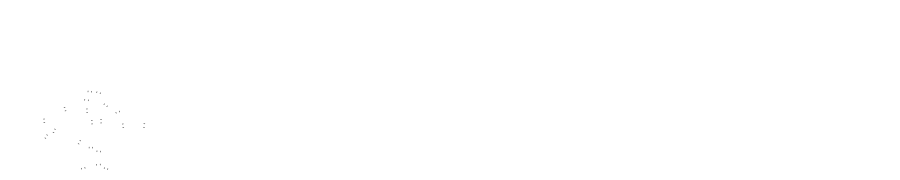

In [21]:
from IPython.display import SVG
from navground.sim.ui import svg_for_world

bounds = [np.array([length,0]),np.array([length*2, width])]
SVG(data=svg_for_world(run.world, width=900, bounds=bounds))